# Rede Neural Adaline

A rede neural Adaline (Adaptive Linear Neuron) é um tipo de rede neural artificial desenvolvida na década de 1960 por Bernard Widrow e Ted Hoff. Adaline é uma das primeiras redes neurais e é baseada em conceitos de aprendizado supervisionado.

## Estrutura e Funcionamento

<img src="images/adaline.png">

### 1. Neurônio
O Adaline consiste em um único neurônio artificial com as seguintes partes:
- **Entradas (x)**: Um vetor de características ou atributos do dado de entrada.
- **Pesos (w)**: Um vetor de coeficientes que são ajustados durante o processo de treinamento.
- **Função de ativação**: A Adaline usa uma função de ativação linear, diferentemente de outras redes neurais que podem usar funções não-lineares.

### 2. Processamento
O processamento em Adaline ocorre em duas etapas principais:

- **Etapa de Somatória**: Calcula a soma ponderada das entradas.
  $$
  u = w \cdot x = \sum_{i=1}^{n} w_i x_i
  $$
  onde $u$ é a soma ponderada, $w$ são os pesos, $x$ são as entradas, e $n$ é o número de entradas.

- **Função de ativação linear**: A saída do neurônio é a própria soma ponderada.
  $$
  y = u
  $$
  onde $y$ é a saída do neurônio.

### 3. Erro e Atualização dos Pesos
O aprendizado na Adaline envolve minimizar o erro entre a saída predita $y$ e a saída desejada $d$ (rótulo ou valor alvo). O erro é calculado como:
$$
e = d - y
$$

Para ajustar os pesos, a Adaline utiliza a regra delta, que é baseada no gradiente descendente:
$$
w_i(t+1) = w_i(t) + \eta \cdot e \cdot x_i
$$
onde $\eta$ é a taxa de aprendizado, $e$ é o erro, $x_i$ é a entrada correspondente, e $t$ é o índice de iteração (tempo).

## Características Importantes

### 1. Linearidade
A função de ativação linear faz com que a Adaline seja apropriada apenas para problemas de classificação linearmente separáveis.

### 2. Convergência
A regra delta utilizada pela Adaline garante a convergência para um mínimo global quando os dados são linearmente separáveis.

<img src="images/gradiente.png">

### 3. Aplicações
Historicamente, Adaline foi aplicada em problemas de reconhecimento de padrões, controle adaptativo e filtragem de sinais.

## Comparação com Perceptron

Apesar de a Adaline ser semelhante ao Perceptron, há diferenças importantes:
- O Perceptron usa uma função de ativação não-linear (degrau), enquanto a Adaline usa uma função de ativação linear.
- A regra de aprendizado do Perceptron ajusta os pesos apenas se a classificação estiver incorreta, enquanto a Adaline ajusta os pesos com base no erro contínuo, independentemente da classificação.

## Conclusão

A Adaline é um modelo simples e pioneiro de rede neural que estabeleceu fundamentos importantes para o desenvolvimento de redes neurais mais complexas. Sua abordagem de aprendizado baseada em gradiente e função de ativação linear oferece uma base clara para entender conceitos de aprendizado supervisionado e otimização.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

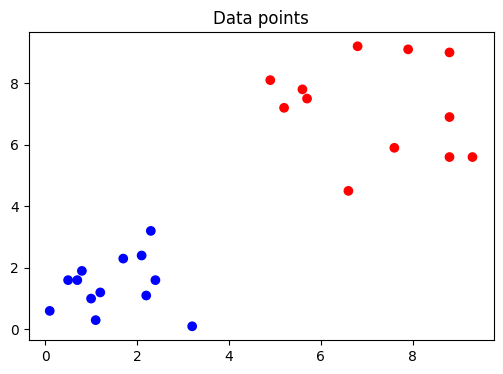

In [ ]:
# Dataset
x = np.array([[1.0, 1.0], [2.1, 2.4], [1.1, 0.3], [2.3, 3.2], [0.1, 0.6],
              [0.5, 1.6], [1.7, 2.3], [0.7, 1.6], [3.2, 0.1], [2.2, 1.1],
              [0.8, 1.9], [2.4, 1.6], [1.2, 1.2], [5.2, 7.2], [6.6, 4.5],
              [4.9, 8.1], [7.6, 5.9], [8.8, 9.0], [5.6, 7.8], [8.8, 5.6],
              [7.9, 9.1], [6.8, 9.2], [8.8, 6.9], [9.3, 5.6], [5.7, 7.5]
             ])

d = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

shuffle = np.random.permutation(len(x))
x = x[shuffle]
d = d[shuffle]

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()


# Se você observar o gráfico gerado e perceber que existe uma 
# linha que pode ser desenhada para separar perfeitamente os pontos 
# das duas classes sem sobreposição, então os dados são linearmente separáveis.

In [3]:
class Adaline:
    
    def __init__(self, lr, e):
        '''Construtor, define taxa de aprendizado e a taxa de erro aceita para convergir'''
        self.lr = lr
        self.e = e
        
    def activation(self, value):
        ''' 1 se value > 0, -1 senão'''
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        ''' Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional'''
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        ''' Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)
    
    def train(self, x, d):
        ''' Definir aleatoriamente os pesos, o bias e o peso do bias
            Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        
        epoch = 0
        self.total_mse = []
        last_mse = np.inf
        
        
        while True:
            mse = 0
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)  
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)
                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias
                
            mse = (mse/len(x))
            print(f"EPOCH: {epoch}\t- MSE: {mse}\t- MSE_ant - MSE: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch +=1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

In [4]:
rede = Adaline(lr = 0.01, e = 1e-4)
rede.train(x = x, d = d)

EPOCH: 0	- MSE: 2.1925587448088972	- MSE_ant - MSE: inf
EPOCH: 1	- MSE: 0.38549752577675056	- MSE_ant - MSE: 1.8070612190321467
EPOCH: 2	- MSE: 0.3368248572193162	- MSE_ant - MSE: 0.04867266855743435
EPOCH: 3	- MSE: 0.29936800121215307	- MSE_ant - MSE: 0.03745685600716314
EPOCH: 4	- MSE: 0.26972545696166983	- MSE_ant - MSE: 0.029642544250483238
EPOCH: 5	- MSE: 0.24582122394155814	- MSE_ant - MSE: 0.023904233020111687
EPOCH: 6	- MSE: 0.22630532419425742	- MSE_ant - MSE: 0.019515899747300725
EPOCH: 7	- MSE: 0.2102452463887261	- MSE_ant - MSE: 0.016060077805531314
EPOCH: 8	- MSE: 0.19696241735594075	- MSE_ant - MSE: 0.013282829032785354
EPOCH: 9	- MSE: 0.185942240439004	- MSE_ant - MSE: 0.011020176916936741
EPOCH: 10	- MSE: 0.17678230163831002	- MSE_ant - MSE: 0.00915993880069399
EPOCH: 11	- MSE: 0.16916095342621276	- MSE_ant - MSE: 0.0076213482120972564
EPOCH: 12	- MSE: 0.16281717081387637	- MSE_ant - MSE: 0.006343782612336396
EPOCH: 13	- MSE: 0.1575369117295039	- MSE_ant - MSE: 0.005280

In [6]:
x_teste = np.array([[1, 4], [3, 1], [3, 2], [5, 5], [6, 7], [4, 8]])

teste_resultado = rede.test(x_teste)
teste_resultado

[-1, -1, -1, 1, 1, 1]

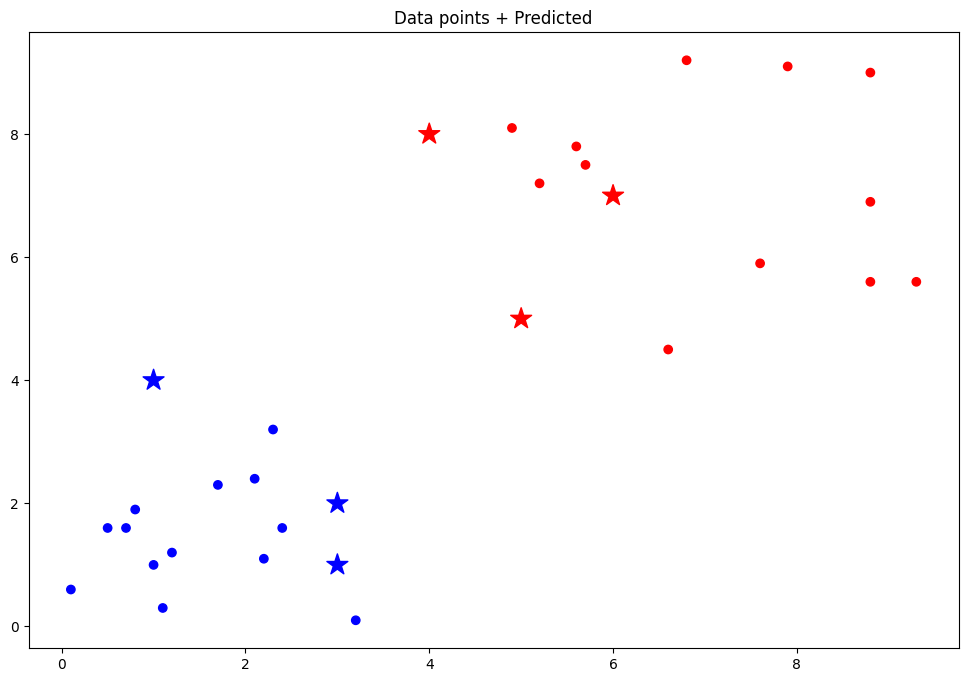

In [7]:
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

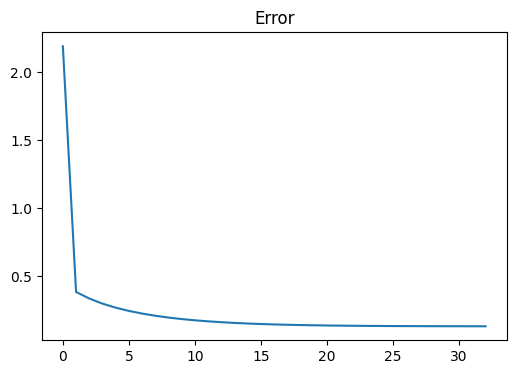

In [8]:
plt.figure(figsize=(6,4))
plt.title("Error")
plt.plot(rede.total_mse)
plt.show()